In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Actualizar el certificado SSL para bajarse el Iris Dataset por URL
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Bajarse el Iris Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [4]:
# Columnas y filas
print(dataset.shape)

(150, 5)


In [5]:
# Muestra de los últimmos 5 datos
print(dataset.tail())

     sepal-length  sepal-width  petal-length  petal-width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [6]:
# Estadística datos Iris dataset
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# Número de datos según la clase:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


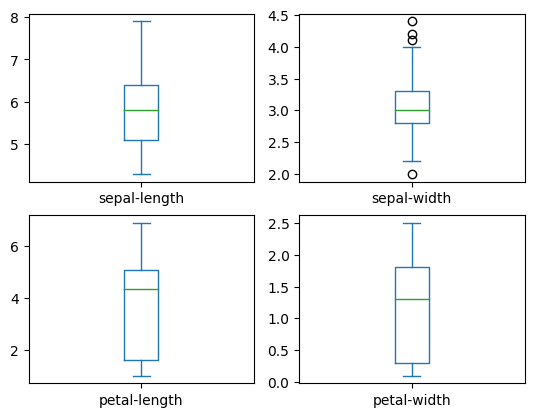

In [8]:
# Visualización de datos:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

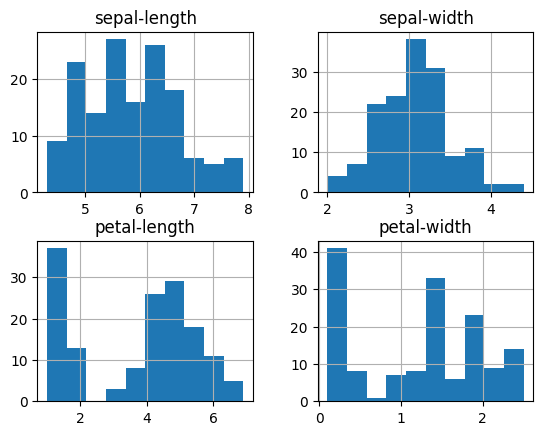

In [9]:
# Plots
dataset.hist()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


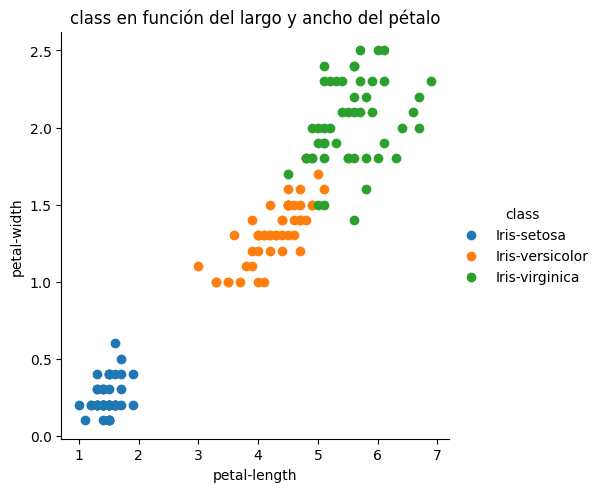

In [10]:
#Petalo

sns.FacetGrid(dataset, hue="class", height=4.8) \
   .map(plt.scatter, "petal-length", "petal-width") \
   .add_legend()

plt.title("class en función del largo y ancho del pétalo")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


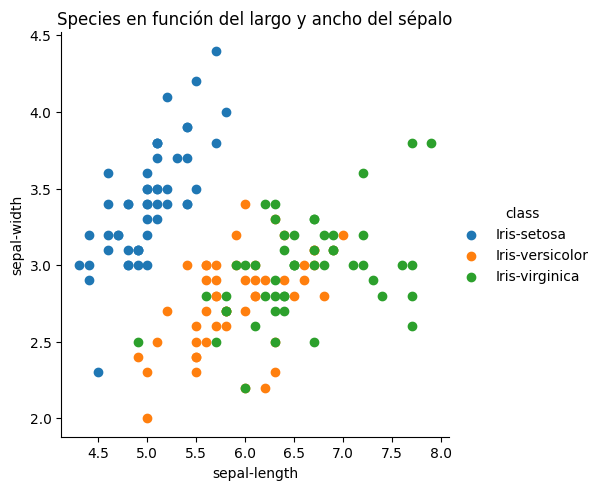

In [11]:
# Para Sépalo

sns.FacetGrid(dataset, hue="class", height = 4.8) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend() \
   .set(title="Species en función del largo y ancho del sépalo")

# plt.title(" Class en función del largo y ancho del sépalo")
plt.show()

In [12]:
# Para el caso de las azules: (iris-setosa)
# Para un largo de 4.3-5.8 y ancho de 2.9-4.4 (aprox) es generalmente de ese tipo

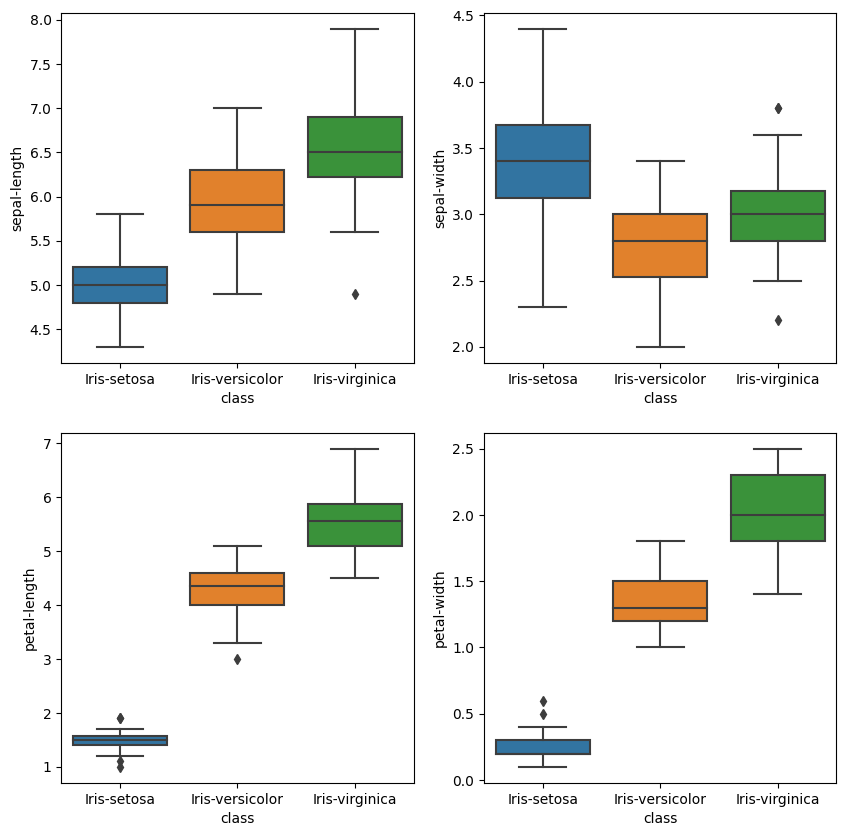

In [13]:
def graph(y):
    sns.boxplot(x="class", y=y, data=dataset)
  
plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal-length')
  
plt.subplot(222)
graph('sepal-width')
  
plt.subplot(223)
graph('petal-length')
  
plt.subplot(224)
graph('petal-width')
  
plt.show()

In [14]:
#Comentario: Conclusiones:
#Observamos que en el caso del Sépalo en virgínica presenta outliers, mientras que en las otras dos especies no.
#En el caso del Pétalo setosa y versicolor presentan outliers para la longitud del pétalo, y en el caso de setosa también para la anchura.
#en el caso de setosa el tamaño del pétalo y también en la longitud del sépalo presenta menor tamaño que las otras dos especies. Y la variabilidad de los datos también es menor en estos casos. Mientras que en la anchura del sépalo la variabilidad es mucho mayor que el de las otras dos especies.

<Axes: xlabel='class', ylabel='petal-width'>

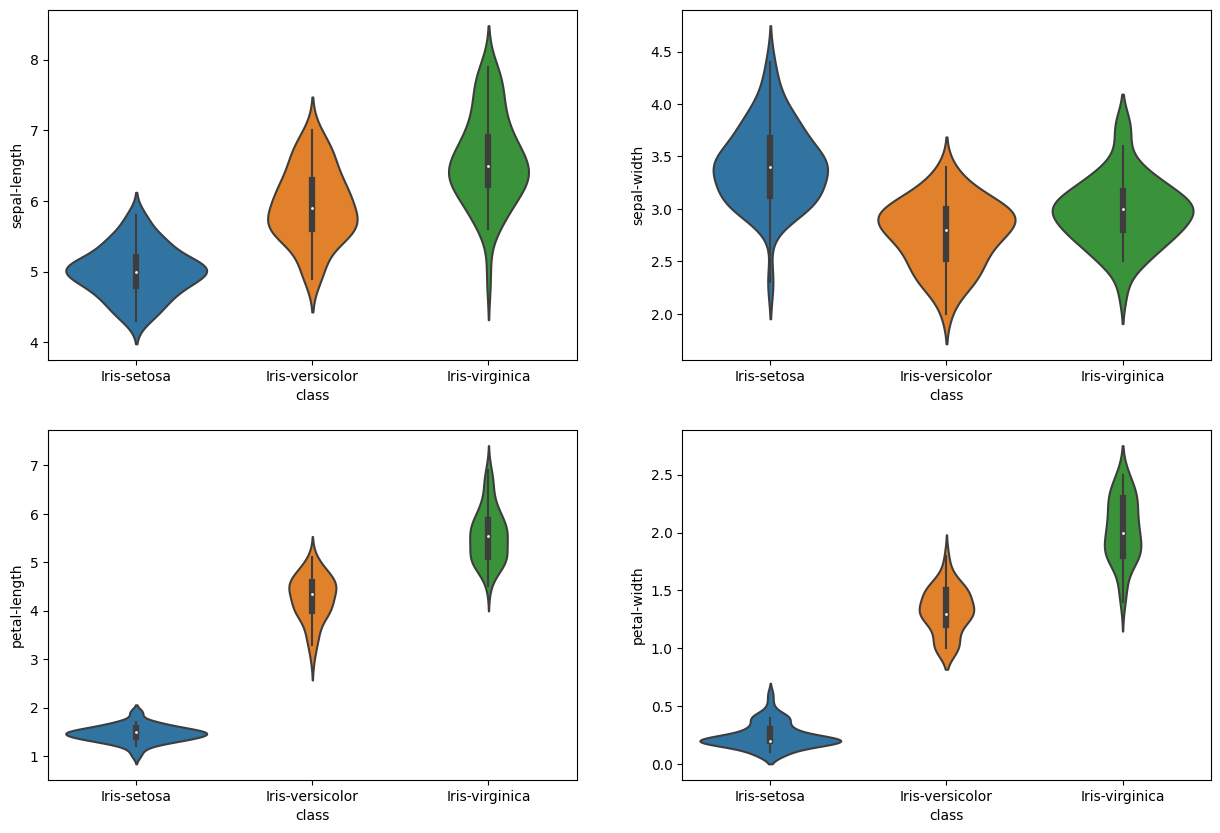

In [15]:
#Violin

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class', y = 'sepal-length', data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='class', y = 'sepal-width', data=dataset)

plt.subplot(2,2,3)
sns.violinplot(x='class', y = 'petal-length', data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='class', y = 'petal-width', data=dataset)

In [16]:
#Comentario: Conclusiones: En el caso de la longitud en virgínica presentan más variabilidad pero en anchura es en setosa, los valores se encuentran concentrados en ambas especies.

In [17]:
#Establezco X, y
dataset.head(2)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [18]:
# drop me permite borrar, axis=1 le indico que las columnas.
X = dataset.drop(["class"], axis = 1)
X.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# y, la salida, sólamente la columna "class"
# Comentar en el caso de get_dummies
y = dataset["class"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Algunas veces necesario para que no devuelvan errores posteriormente.
X = X.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [22]:
y = y.values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# test_size por defecto es 0, osea 75%-25%

In [24]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
# 1-nuestro clasificador (clf) será DecisionTreeClassifier
clf = DecisionTreeClassifier()
# 2-Entreno con los datos que indico entre paréntesis.
clf.fit(X_train, y_train)
# 3-Realizo la predición
y_pred = clf.predict(X_test)
# imprimo esa predicción
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [26]:
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test, y_pred)
cm_dtc

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [27]:
# Una posible forma para ello es accuracy_score
# existen muchas otras, pero por el momento es suficiente
from sklearn.metrics import accuracy_score

In [28]:
# me dice que % de coincidencias hay
acc_dtc = accuracy_score(y_test, y_pred)
acc_dtc

0.9736842105263158

In [29]:
#Naives Bayer
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = gnb.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype='<U15')

In [31]:
cm_nb = confusion_matrix(y_test, y_pred)
cm_nb

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

In [32]:
acc_nb = accuracy_score(y_test, y_pred)
acc_nb

1.0

In [33]:
#Model Pickle
import pickle

pickle.dump(gnb, open('model.pkl', 'wb'))

In [34]:
# Realizamos en el backend con los datos de la predicción: Iris-Vírginica

pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict([[1.2, 0.6, 5.6, 1.5]])

array(['Iris-virginica'], dtype='<U15')